In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


In [4]:
import os
os.getcwd()


'/Users/soumsingh/Desktop/fraud_engine'

In [5]:
os.listdir()


['.DS_Store', '01_eda.ipynb', 'creditcard.csv', '.venv', '.ipynb_checkpoints']

In [6]:
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [9]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
df['Class'].mean() * 100


np.float64(0.1727485630620034)

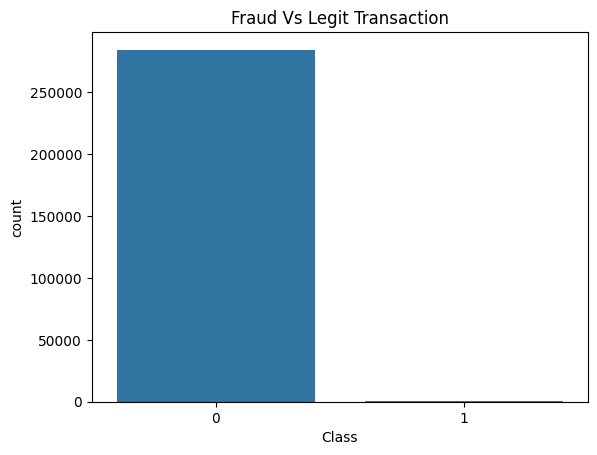

In [14]:
sns.countplot(x = 'Class', data = df)
plt.title('Fraud Vs Legit Transaction')
plt.show()

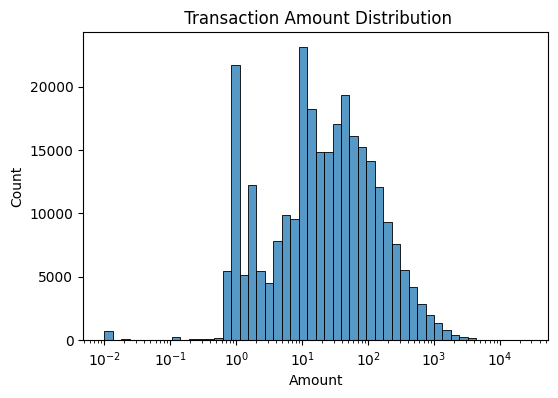

In [15]:
plt.figure( figsize = (6,4))
sns.histplot(df['Amount'],bins = 50, log_scale = True)
plt.title( ' Transaction Amount Distribution')
plt.show()

# Credit Card Fraud Detection – EDA

- Total transactions: 284,807  
- Fraud transactions: 492 (~0.17%)  
- Dataset is highly imbalanced  
- Features V1–V28 are PCA-transformed for privacy  
- Amount feature is highly skewed  

Next step: preprocessing and baseline modeling.


# PREPROCESSING 

1. Separate features (X) and target (y)

2. Train–test split (stratified)

3. Scale numerical features

4. Handle extreme class imbalance

5. Verify everything

In [17]:
X = df.drop("Class", axis=1)
y = df["Class"]

X.shape, y.shape


((284807, 30), (284807,))

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((227845, 30), (56962, 30))

In [19]:
y_train.mean() * 100, y_test.mean() * 100


(np.float64(0.17292457591783889), np.float64(0.17204452090867595))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

In [23]:
X_train_scaled.mean(axis=0)[:5], X_train_scaled.std(axis=0)[:5]


(array([-1.40957808e-16, -7.48448536e-19, -3.99172552e-18,  5.86284686e-18,
        -1.24741423e-18]),
 array([1., 1., 1., 1., 1.]))

### This scaler will later be used in:

1. API serving

2. Batch inference

In [24]:
import joblib

joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']

# BASE LINE MODEL 

In [25]:
from sklearn.linear_model import LogisticRegression 

lr_model = LogisticRegression( 
    max_iter = 1000, 
    class_weight = "balanced",
    n_jobs = -1
)

lr_model.fit(X_train_scaled, y_train)

/Users/soumsingh/Desktop/fraud_engine/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [28]:
# PREDICTION 

y_test_proba = lr_model.predict_proba(X_test_scaled)[:,1]

In [29]:
y_test_proba

array([0.00531256, 0.06593458, 0.00011581, ..., 0.00024397, 0.0038044 ,
       0.08358063], shape=(56962,))

In [44]:
# FOR REFERENCE ONLY
thresold = 0.3
y_test_pred = (y_test_proba >= thresold).astype(int)


In [45]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(56962,))

In [46]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

print(classification_report(y_test,y_test_pred))
print( 'ROC_AUC:', roc_auc_score(y_test, y_test_proba))
print("PR-AUC:", average_precision_score(y_test, y_test_proba))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.03      0.92      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.93      0.51     56962
weighted avg       1.00      0.94      0.97     56962

ROC_AUC: 0.9720983040092795
PR-AUC: 0.7169926343963122


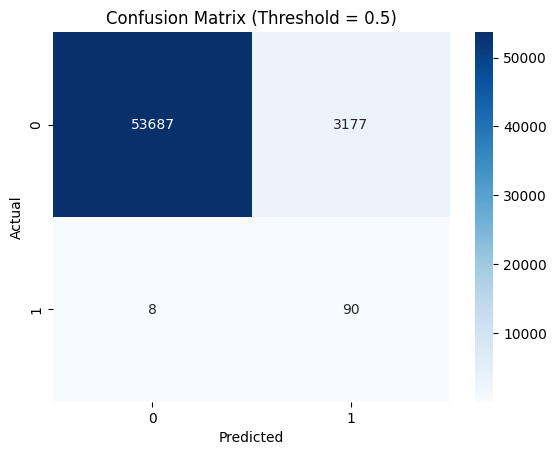

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Threshold = 0.5)")
plt.show()


In [48]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc


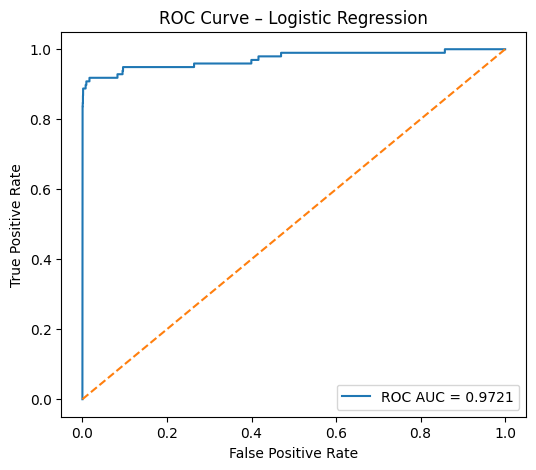

In [49]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()


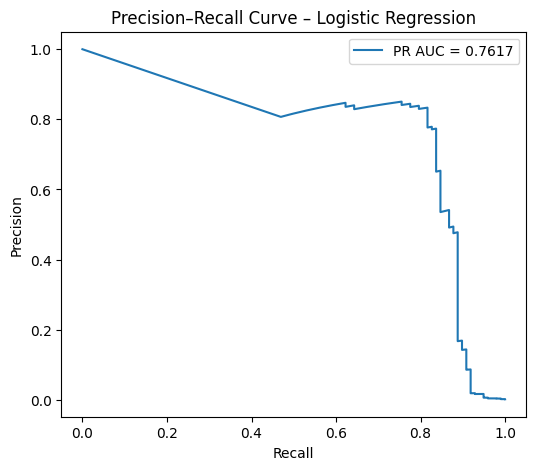

In [50]:
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Logistic Regression")
plt.legend()
plt.show()


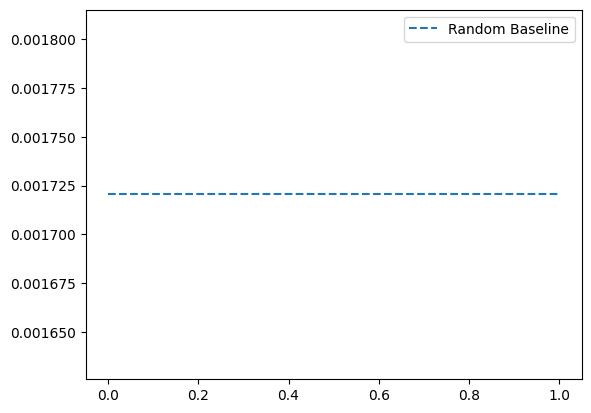

In [51]:
baseline = y_test.mean()
plt.hlines(baseline, xmin=0, xmax=1, linestyles="dashed", label="Random Baseline")
plt.legend()


In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    min_samples_leaf=50,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",12
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",50
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [53]:
y_test_proba_rf = rf_model.predict_proba(X_test)[:, 1]


In [54]:
from sklearn.metrics import roc_auc_score, average_precision_score

print("RF ROC-AUC:", roc_auc_score(y_test, y_test_proba_rf))
print("RF PR-AUC:", average_precision_score(y_test, y_test_proba_rf))


RF ROC-AUC: 0.9769195997898316
RF PR-AUC: 0.7963482616880129


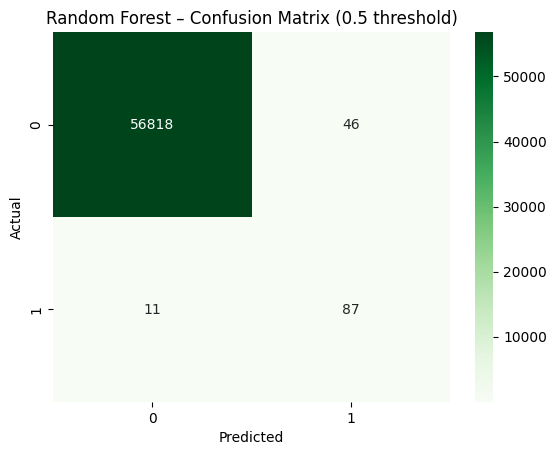

In [55]:
y_test_pred_rf = (y_test_proba_rf >= 0.5).astype(int)

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_test_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest – Confusion Matrix (0.5 threshold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


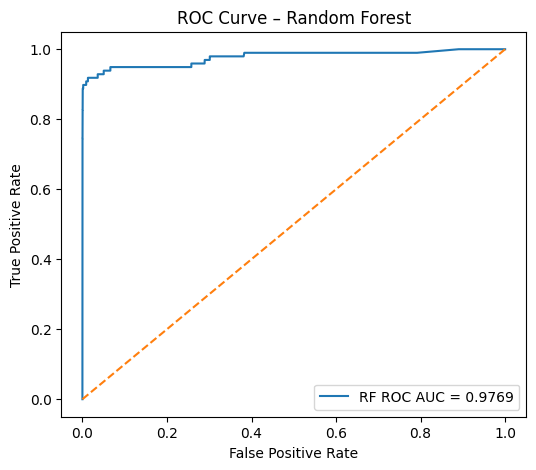

In [56]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label=f"RF ROC AUC = {roc_auc_rf:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()


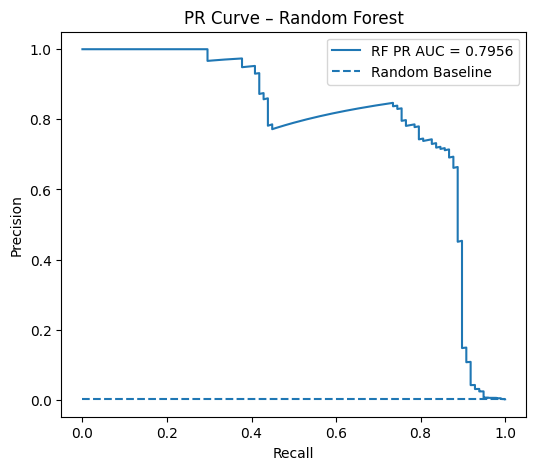

In [57]:
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_test_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(6,5))
plt.plot(recall_rf, precision_rf, label=f"RF PR AUC = {pr_auc_rf:.4f}")
plt.hlines(y_test.mean(), 0, 1, linestyles="dashed", label="Random Baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve – Random Forest")
plt.legend()
plt.show()


## Baseline Model Comparison

| Model | ROC-AUC | PR-AUC | Notes |
|------|--------|--------|------|
| Logistic Regression | ~X | ~Y | High recall, linear |
| Random Forest | ~X | ~Y | Better non-linearity |

Random Forest improves precision but requires threshold tuning to reach high recall.


## Feature importance from tree models

In [59]:
feature_names = X_train.columns
importances = rf_model.feature_importances_

feat_importance = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feat_importance.head(10)


,feature,importance
14,V14,0.191645
10,V10,0.114838
12,V12,0.099208
4,V4,0.096944
17,V17,0.096334
3,V3,0.069775
11,V11,0.051196
16,V16,0.039473
2,V2,0.038312
9,V9,0.026202


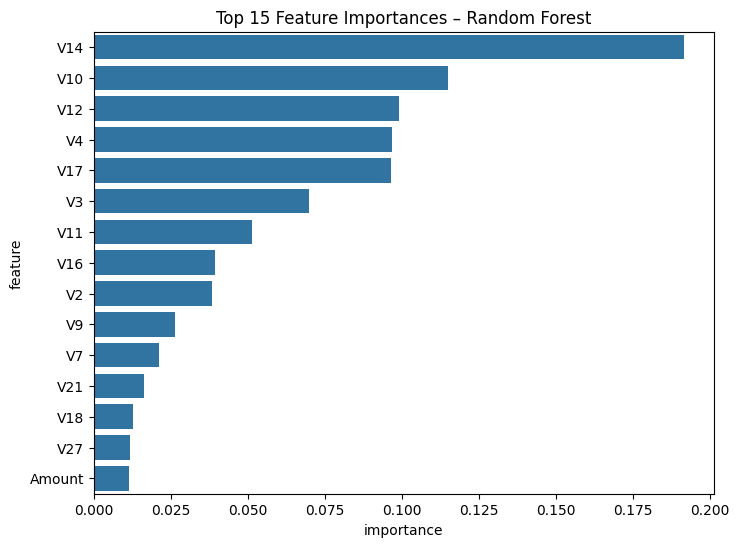

In [60]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=feat_importance.head(15),
    x="importance",
    y="feature"
)
plt.title("Top 15 Feature Importances – Random Forest")
plt.show()


## Feature Importance Insights

- Features like V14, V10, and V12 have the highest importance
- These features represent strong latent transaction behavior signals
- In real systems, these would map to:
  - Velocity anomalies
  - Amount deviations
  - Behavioral inconsistencies

Feature importance helps guide rule-based fraud checks and analyst reviews.


In [61]:
lr_importance = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": lr_model.coef_[0]
}).sort_values(by="coefficient", key=abs, ascending=False)

lr_importance.head(10)


,feature,coefficient
29,Amount,2.367276
1,V1,1.723862
14,V14,-1.494961
4,V4,1.339431
10,V10,-1.334996
5,V5,1.214379
12,V12,-1.127886
16,V16,-0.996376
17,V17,-0.992185
2,V2,0.932075


# Thresold Evaluation 

In [64]:
import numpy as np
from sklearn.metrics import precision_score, recall_score


In [65]:
def evaluate_thresholds(y_true, y_proba, thresholds):
    results = []

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred)
        results.append((t, precision, recall))

    return results


In [66]:
thresholds = np.linspace(0.01, 0.5, 50)

lr_results = evaluate_thresholds(y_test, y_test_proba, thresholds)

lr_results[:5]


[(np.float64(0.01), 0.0024260917412835775, 0.9897959183673469),
 (np.float64(0.02), 0.0031246979995490126, 0.9897959183673469),
 (np.float64(0.03), 0.0037764053341725343, 0.9795918367346939),
 (np.float64(0.04), 0.004353262631408327, 0.9591836734693877),
 (np.float64(0.05), 0.005029696612980898, 0.9591836734693877)]

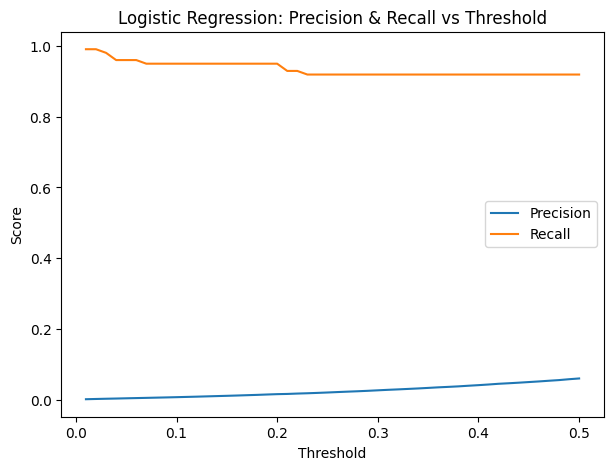

In [67]:
lr_thresholds, lr_precisions, lr_recalls = zip(*lr_results)

plt.figure(figsize=(7,5))
plt.plot(lr_thresholds, lr_precisions, label="Precision")
plt.plot(lr_thresholds, lr_recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Logistic Regression: Precision & Recall vs Threshold")
plt.legend()
plt.show()


In [68]:
for t, p, r in lr_results:
    if r >= 0.90:
        print(f"Threshold: {t:.3f}, Precision: {p:.3f}, Recall: {r:.3f}")
        break


Threshold: 0.010, Precision: 0.002, Recall: 0.990


In [69]:
rf_results = evaluate_thresholds(y_test, y_test_proba_rf, thresholds)


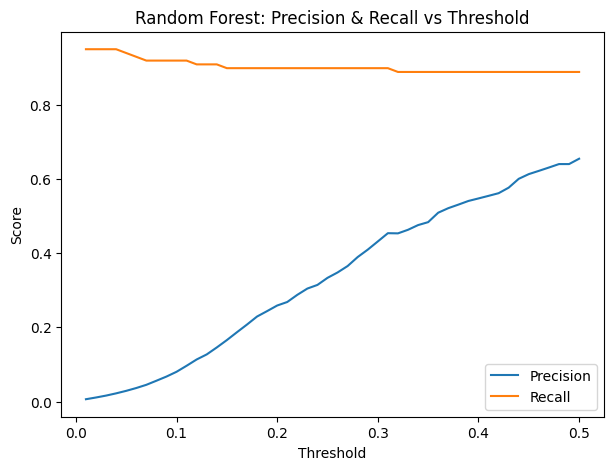

In [70]:
rf_thresholds, rf_precisions, rf_recalls = zip(*rf_results)

plt.figure(figsize=(7,5))
plt.plot(rf_thresholds, rf_precisions, label="Precision")
plt.plot(rf_thresholds, rf_recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Random Forest: Precision & Recall vs Threshold")
plt.legend()
plt.show()


## Threshold Tuning Summary

- Logistic Regression achieves higher recall at lower thresholds
- Random Forest provides better precision at higher thresholds
- Final threshold selection depends on business tolerance for false positives

In high-risk domains, recall is prioritized over precision.


In [71]:
import os, joblib
os.makedirs("models", exist_ok=True)

# Save scaler
joblib.dump(scaler, "models/scaler.joblib")

# Save logistic regression & random forest
joblib.dump(lr_model, "models/lr_model.joblib")
joblib.dump(rf_model, "models/rf_model.joblib")

# Optionally save the feature column ordering so the API knows what to expect
import json
feature_list = list(X_train.columns)
with open("models/feature_columns.json", "w") as f:
    json.dump(feature_list, f)
